In [1]:
#initial Imports
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline


#algorithm imports
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
le = LabelEncoder()

## Read in Data and preform basic cleaning 


In [3]:
file_path = Path("Resources/world_2019_data.csv")

In [4]:
df = pd.read_csv(file_path)
df

,country_name,country_code,h_2019,edu_2019,e_2019,con_2019,inf_2019,une_2019,p_2019,g_2019,income_group
0,Angola,AGO,2.53,2.923862e+09,2.827171e+10,4.057062e+10,17.08,7.42,31825299,-0.70,Low income
1,Armenia,ARM,11.34,3.161166e+08,5.631686e+09,1.307507e+10,1.44,18.30,2957728,7.60,High income
2,Australia,AUS,9.91,6.777152e+10,3.364310e+11,1.033080e+12,1.61,5.16,25365745,2.11,High income
3,Austria,AUT,10.43,2.241872e+10,2.467240e+11,3.160610e+11,1.53,4.49,8879920,1.49,High income
4,Azerbaijan,AZE,4.04,1.178561e+09,2.362976e+10,3.306206e+10,2.61,4.85,10024283,2.50,High income
...,...,...,...,...,...,...,...,...,...,...,...
123,Ukraine,UKR,7.10,7.662706e+09,6.344856e+10,1.433540e+11,7.89,8.19,44386203,3.20,Low income
124,Uruguay,URY,9.35,2.774959e+09,1.699176e+10,4.865871e+10,7.88,8.88,3461731,0.35,High income
125,United States,USA,16.77,9.540000e+11,2.519730e+12,1.740260e+13,1.81,3.67,328329953,2.29,High income
126,Vanuatu,VUT,3.36,4.506711e+07,4.714967e+08,7.126577e+08,2.76,1.80,299882,3.24,Low income


In [5]:
#check data types
df.dtypes

country_name     object
country_code     object
h_2019          float64
edu_2019        float64
e_2019          float64
con_2019        float64
inf_2019        float64
une_2019        float64
p_2019            int64
g_2019          float64
income_group     object
dtype: object

In [6]:
#encode y column
df['income_group'] = le.fit_transform(df['income_group'])
df = df.drop(columns=["country_name", "country_code"])

In [7]:
df = df.rename(columns={"une_2019": "Unemployment",'e_2019':"Exports", 'h_2019':"Healthcare Expenditures", 'inf_2019':"Inflation Rate", 'p_2019':"Population",
                       'edu_2019':"Education Expenditures", 'g_2019':"GDP Growth", 'con_2019':"Consumption"}, inplace=False)
df


,Healthcare Expenditures,Education Expenditures,Exports,Consumption,Inflation Rate,Unemployment,Population,GDP Growth,income_group
0,2.53,2.923862e+09,2.827171e+10,4.057062e+10,17.08,7.42,31825299,-0.70,1
1,11.34,3.161166e+08,5.631686e+09,1.307507e+10,1.44,18.30,2957728,7.60,0
2,9.91,6.777152e+10,3.364310e+11,1.033080e+12,1.61,5.16,25365745,2.11,0
3,10.43,2.241872e+10,2.467240e+11,3.160610e+11,1.53,4.49,8879920,1.49,0
4,4.04,1.178561e+09,2.362976e+10,3.306206e+10,2.61,4.85,10024283,2.50,0
...,...,...,...,...,...,...,...,...,...
123,7.10,7.662706e+09,6.344856e+10,1.433540e+11,7.89,8.19,44386203,3.20,1
124,9.35,2.774959e+09,1.699176e+10,4.865871e+10,7.88,8.88,3461731,0.35,0
125,16.77,9.540000e+11,2.519730e+12,1.740260e+13,1.81,3.67,328329953,2.29,0
126,3.36,4.506711e+07,4.714967e+08,7.126577e+08,2.76,1.80,299882,3.24,1


In [8]:
#define Varibles
X = df.drop(columns= "income_group")
# X

y = df["income_group"]

In [9]:
# Check the balance of our target values
y.value_counts()

0    79
1    49
Name: income_group, dtype: int64

In [10]:
y_percent = (49/(79+49))*100
print(f"y = {y_percent}%")

y = 38.28125%


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
#check the size of the training and testing sets
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(96, 8)
(32, 8)
(96,)
(32,)


In [13]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest

In [14]:
# Resample the training data with the BalancedRandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)

In [15]:
#fit the model
random_forest = random_forest.fit(X_train_scaled, y_train)

In [16]:
#make predictions
predictions = random_forest.predict(X_test_scaled)

In [17]:
#create the confusion matrix
y_pred = random_forest.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  2],
       [ 3,  9]], dtype=int64)

In [18]:
#display the confusion matrix
rf_cm_df = pd.DataFrame(cm)
rf_cm_df = rf_cm_df.set_axis(["Predicted High Income", " Predicted Low Income"], axis = 1)
rf_cm_df = rf_cm_df.set_axis(["Actual High Income", "Actual Low Income"], axis = 0)
rf_cm_df

,Predicted High Income,Predicted Low Income
Actual High Income,18,2
Actual Low Income,3,9


In [19]:
#calculate balanced accuracy score
rf_acc_score = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy Score: {rf_acc_score:.2}')

Balanced Accuracy Score: 0.82


In [20]:
#Print imbalanced classification report
rf_imbalanced_classification_report = classification_report(y_test, y_pred)
print(rf_imbalanced_classification_report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.82      0.75      0.78        12

    accuracy                           0.84        32
   macro avg       0.84      0.82      0.83        32
weighted avg       0.84      0.84      0.84        32



## Balanced Random Forest

In [21]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
balanced_forest = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

In [22]:
#fit the model
balanced_forest = balanced_forest.fit(X_train_scaled, y_train)

In [23]:
#make predictions
predictions = balanced_forest.predict(X_test_scaled)

In [24]:
#create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  2],
       [ 3,  9]], dtype=int64)

In [25]:
#display confusion matrix
brf_cm_df = pd.DataFrame(cm)
brf_cm_df = brf_cm_df.set_axis(["Predicted High Income", " Predicted Low Income"], axis = 1)
brf_cm_df = brf_cm_df.set_axis(["Actual High Income", "Actual Low Income"], axis = 0)
brf_cm_df

,Predicted High Income,Predicted Low Income
Actual High Income,18,2
Actual Low Income,3,9


In [26]:
#calculate balanced accuracy score
# y_pred = balanced_forest.predict(X_test)
y_pred = balanced_forest.predict(X_test_scaled)
brf_acc_score = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy Score: {brf_acc_score:.2}')

Balanced Accuracy Score: 0.8


In [27]:
#Print imbalanced classification report
brf_imbalanced_classification_report = classification_report(y_test, y_pred)
print(brf_imbalanced_classification_report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.75      0.75      0.75        12

    accuracy                           0.81        32
   macro avg       0.80      0.80      0.80        32
weighted avg       0.81      0.81      0.81        32



In [28]:
## Over Sampling
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

In [29]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [30]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

os_cm_df = pd.DataFrame(cm)
os_cm_df = rf_cm_df.set_axis(["Predicted High Income", " Predicted Low Income"], axis = 1)
os_cm_df = rf_cm_df.set_axis(["Actual High Income", "Actual Low Income"], axis = 0)
os_cm_df

,Predicted High Income,Predicted Low Income
Actual High Income,18,2
Actual Low Income,3,9


In [31]:
y_pred = model.predict(X_test)

In [32]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
#display confusion matrix
#display the confusion matrix
os_cm_df = pd.DataFrame(cm)
os_cm_df = rf_cm_df.set_axis(["Predicted High Income", " Predicted Low Income"], axis = 1)
os_cm_df = rf_cm_df.set_axis(["Actual High Income", "Actual Low Income"], axis = 0)
os_cm_df

,Predicted High Income,Predicted Low Income
Actual High Income,18,2
Actual Low Income,3,9


In [34]:
# Calculated the balanced accuracy score
os_balanced_accuracy_score = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy Score: {os_balanced_accuracy_score:.2}')


Balanced Accuracy Score: 0.5


In [35]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      1.00      0.00      0.77      0.00      0.00        20
          1       0.00      0.00      1.00      0.00      0.00      0.00        12

avg / total       0.39      0.62      0.38      0.48      0.00      0.00        32



## Under Sampling


In [36]:
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train_scaled, y_train)

In [37]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [38]:
#make predictions
y_pred = model.predict(X_test_scaled)

In [39]:
#create confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [40]:
#display the confusion matrix
us_cm_df = pd.DataFrame(cm)
us_cm_df = rf_cm_df.set_axis(["Predicted High Income", " Predicted Low Income"], axis = 1)
us_cm_df = rf_cm_df.set_axis(["Actual High Income", "Actual Low Income"], axis = 0)
us_cm_df

,Predicted High Income,Predicted Low Income
Actual High Income,18,2
Actual Low Income,3,9


In [41]:
# Calculated the balanced accuracy score
us_balanced_accuracy_score = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy Score: {us_balanced_accuracy_score:.2}')


Balanced Accuracy Score: 0.74


In [42]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.65      0.83      0.74      0.74      0.53        20
          1       0.59      0.83      0.65      0.69      0.74      0.55        12

avg / total       0.76      0.72      0.76      0.72      0.74      0.54        32



## Combination of Under and Over sampling

In [43]:
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [44]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [45]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [46]:
#display the confusion matrix
sm_cm_df = pd.DataFrame(cm)
sm_cm_df = rf_cm_df.set_axis(["Predicted High Income", " Predicted Low Income"], axis = 1)
sm_cm_df = rf_cm_df.set_axis(["Actual High Income", "Actual Low Income"], axis = 0)
sm_cm_df

,Predicted High Income,Predicted Low Income
Actual High Income,18,2
Actual Low Income,3,9


In [47]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)
SMO_balanced_accuracy_score = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy Score: {SMO_balanced_accuracy_score:.2}')

Balanced Accuracy Score: 0.5


In [48]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      1.00      0.00      0.77      0.00      0.00        20
          1       0.00      0.00      1.00      0.00      0.00      0.00        12

avg / total       0.39      0.62      0.38      0.48      0.00      0.00        32



## Summary

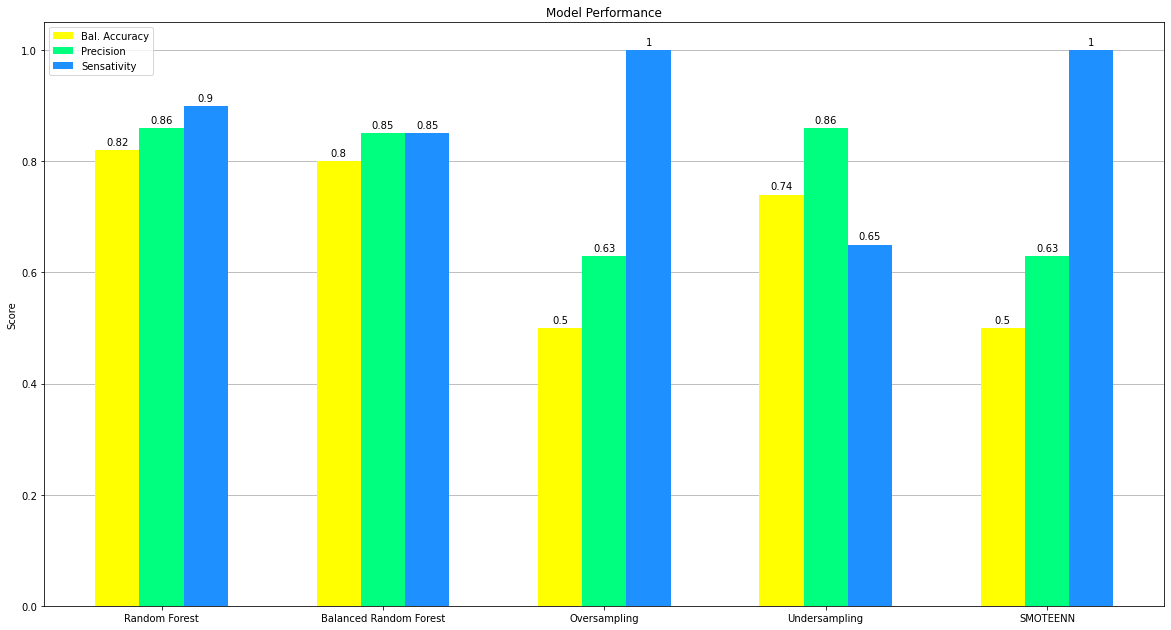

In [49]:
labels = ["Random Forest", "Balanced Random Forest", "Oversampling", "Undersampling", "SMOTEENN"]
Balanced_Accuracy = [0.82, 0.80, 0.50,  0.74, 0.50]
Precision = [0.86, 0.85, 0.63, 0.86, 0.63]
Sensativity = [0.90, 0.85 , 1.00,  0.65, 1.00]
    
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, Balanced_Accuracy, width, color="yellow", label='Bal. Accuracy' )
rects2 = ax.bar(x, Precision, width, color="springgreen", label='Precision')
rects3 = ax.bar(x + 0.2, Sensativity, width, color="dodgerblue",label='Sensativity')

# #add grid
plt.grid(visible=True, fillstyle= "bottom", which='major', axis='y')
ax.set_axisbelow(True)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance')
ax.set_xticks(x, labels)
ax.legend()

#label bars with performance values
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
fig.set_size_inches(18, 10)
plt.savefig('Resources/model_performance.png')

plt.show()

In [50]:
#create df of results
summary_df = pd.DataFrame(list(zip(labels, Balanced_Accuracy, Precision,  Sensativity)),
               columns =["Algorithm", "Balanced Accuracy", "Precision", "sensativity"])
summary_df

,Algorithm,Balanced Accuracy,Precision,sensativity
0,Random Forest,0.82,0.86,0.90
1,Balanced Random Forest,0.80,0.85,0.85
2,Oversampling,0.50,0.63,1.00
3,Undersampling,0.74,0.86,0.65
4,SMOTEENN,0.50,0.63,1.00


In [51]:
# summarize resulte of model that preformed the best
print('Best Preforming model: Random Forest Algorithm')
print("")
print(f"Accuracy Score:{rf_acc_score}")
print("")
print("Random  Forest Imbalanced Classification Report")
print(rf_imbalanced_classification_report)


Best Preforming model: Random Forest Algorithm

Accuracy Score:0.825

Random  Forest Imbalanced Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.82      0.75      0.78        12

    accuracy                           0.84        32
   macro avg       0.84      0.82      0.83        32
weighted avg       0.84      0.84      0.84        32



In [52]:
# sort by importance
rf_importances = sorted(zip(random_forest.feature_importances_, X.columns), reverse=True)
rf_importances

[(0.20263581061361444, 'Exports'),
 (0.1508718466995432, 'Healthcare Expenditures'),
 (0.14922838270663585, 'Inflation Rate'),
 (0.13270022316218957, 'Population'),
 (0.12702210445601658, 'Education Expenditures'),
 (0.09074350099131952, 'GDP Growth'),
 (0.0891304630718977, 'Consumption'),
 (0.05766766829878314, 'Unemployment')]

In [53]:
#Summarize importances using a df
#a. read into df
rf_features_importances_df = pd.DataFrame(rf_importances)

# b. rename columns
rf_features_importances_df = rf_features_importances_df.set_axis(["Importance", "Indicator"], axis=1)
rf_features_importances_df


,Importance,Indicator
0,0.202636,Exports
1,0.150872,Healthcare Expenditures
2,0.149228,Inflation Rate
3,0.132700,Population
4,0.127022,Education Expenditures
5,0.090744,GDP Growth
6,0.089130,Consumption
7,0.057668,Unemployment
